<p style="font-weight: bold;">EOS 312 - Lab 7 - Alkalinity</p> <br>
Group D - Delirious Dolphin Disciples <br>

Contents: <br>
1 $\to$ DETERMINE ACID CONCENTRATION USING THE TWO REFERENCE TITRATIONS <br>
2 $\to$ CALCULATE ALKALINITY OF S2.5 SAMPLES <br>
3 $\to$ PLOT 2024, 2025, AND 2026 ALKALINITY PROFILES <br>



In [188]:
import matplotlib.pyplot as plt
import eos312labtools as tb # tb = tool-box
import pandas as pd

In [189]:
# IMPORT PREVIOUS YEARS' DATA

df = pd.read_csv('EOS312_Chem_Jan2026.csv', header=[0], skiprows=[1])
df_2025 = pd.read_csv('EOS312_Chem_Jan2025.csv', header=[0], skiprows=[1])
df_2024 = pd.read_csv('EOS312_Chem_Jan2024.csv', header=[0], skiprows=[1])

df_25_S2 = df_2025[df_2025['Station']== 'S2   ']
df_25_plotS2 = df_25_S2[df_25_S2['alkalinity'].notna()]

df_24_S25 = df_2024[df_2024['Station']== 'S2.5 ']
df_24_plotS25 = df_24_S25[df_24_S25['alkalinity'].notna()]

In [190]:
# IMPORT THIS-YEAR'S DATA

ds = pd.read_csv('PreData.csv', header=[0], skiprows=[1])

df_ref1 = ds[ds['station']== 'std1']

df_ref2 = ds[ds['station']== 'std2']

df_S25 = ds[ds['station']== 'S2.5']

In [191]:
# 1. DETERMINE ACID CONCENTRATION USING THE TWO REFERENCE TITRATIONS

ref_titration_temp = 22                # °C
ref_salinity = 32.71                   # PSS-78

## ACID REFERENCE 1
# ref_alkalinity = 2183.64 μeq/kg or something like that

ref_acid_vol_1 = df_ref1['vol_acid']   
ref_emf_values_1 = df_ref1['emf_values'] # mV
ref_sample_mass_1 = 133.9                # g
ref_acid_conc_1 = 0.0842585              # mol/kg

ref_alk1 = tb.AlkCalc(ref_acid_vol_1, ref_emf_values_1, ref_sample_mass_1, ref_titration_temp, ref_salinity, ref_acid_conc_1)
print(f"Alkalinity of reference run 1 = {round(ref_alk1,2)} μeq/kg")

## ACID REFERENCE 2
# ref_alkalinity = 2183.64 μeq/kg or something like that

ref_acid_vol_2 = df_ref2['vol_acid']   
ref_emf_values_2 = df_ref2['emf_values'] # mV
ref_sample_mass_2 = 139.56               # g
ref_acid_conc_2 = 0.08394906             # mol/kg

ref_alk = tb.AlkCalc(ref_acid_vol_2, ref_emf_values_2, ref_sample_mass_2, ref_titration_temp, ref_salinity, ref_acid_conc_2)
print(f"Alkalinity of reference run 2 = {round(ref_alk,2)} μeq/kg")


ref_acid_conc = (ref_acid_conc_1 + ref_acid_conc_2)/2
print(f"By iteration, we find that the concentration of the acid is around {round(AcidConc,3)} mol/kg")



Alkalinity of reference run 1 = 2183.64 μeq/kg
Alkalinity of reference run 2 = 2183.64 μeq/kg
By iteration, we find that the concentration of the acid is around 0.084 mol/kg


In [192]:
# 2. CALCULATE ALKALINITY OF S2.5 SAMPLES

alkalinity = []

# AlkCalc requires single variables of mass, dep for each sample run
depth = df_S25['depths'].unique()
mass = df_S25['sample_mass'].unique() 
salinity = df_S25['salinity'].unique()

for i in range(len(depth)):
    df_S25_i = df_S25[df_S25['depths'] == depth[i]]
    
    S25_acid_vol = df_S25_i['vol_acid']       # ml (array)
    S25_emf_values = df_S25_i['emf_values']   # mV (array)

    S25_sample_mass = mass[i]                 # g (single variable)
    S25_titration_temp = 22                   # °C (single variable)
    S25_salinity = salinity[i]                # PSS-78 (single variable)
    
    alk = tb.AlkCalc(S25_acid_vol, S25_emf_values, S25_sample_mass, S25_titration_temp, S25_salinity, ref_acid_conc)
    
    alkalinity.append(float(alk))

print(f'The alkalinity of samples collected at depths of {depth} were {alkalinity} μeq/kg respectively.')


The alkalinity of samples collected at depths of [  0.  60. 105. 120. 220.] were [1258.5312217895248, 2068.2264995521464, 2164.720652420174, 2249.2792024721007, 2254.2506722924677] μeq/kg respectively.


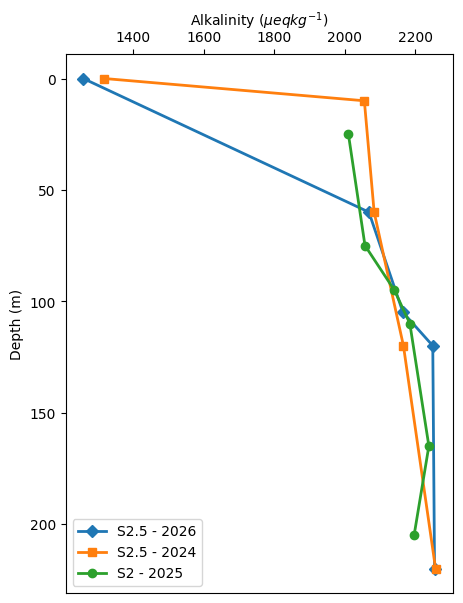

In [193]:
# 3. PLOT 2024, 2025, AND 2026 ALKALINITY PROFILES

plt.figure(figsize=(5, 7))
plt.plot(alkalinity, depth, marker='D', linewidth='2', label='S2.5 - 2026')
plt.plot(df_24_plotS25['alkalinity'].astype(float), df_24_plotS25['Depth'].astype(float), marker='s', linewidth='2', label='S2.5 - 2024')
plt.plot(df_25_plotS2['alkalinity'].astype(float), df_25_plotS2['Depth'].astype(float), marker='o', linewidth='2', label='S2 - 2025')
plt.xlabel(r'Alkalinity ($\mu eqkg^{-1}$)')
plt.ylabel('Depth (m)')
plt.gca().invert_yaxis()
plt.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
ax = plt.gca()
ax.xaxis.set_label_position('top')
plt.legend()
plt.show()